In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

### Etapa 1: Lectura del dataset

In [2]:
datos = datasets.load_iris()
#print(datos.DESCR)

In [3]:
df = pd.DataFrame(datos.data,columns=datos.feature_names)
df['Class']=datos.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Etapa 2: Exploración de los datos

In [4]:
df.Class.value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

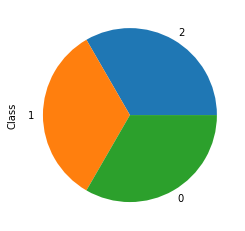

In [5]:
df.Class.value_counts().plot(kind='pie')

In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Class,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

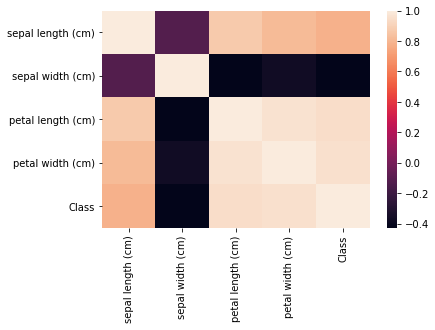

In [7]:
sns.heatmap(df.corr())

https://seaborn.pydata.org/tutorial/color_palettes.html

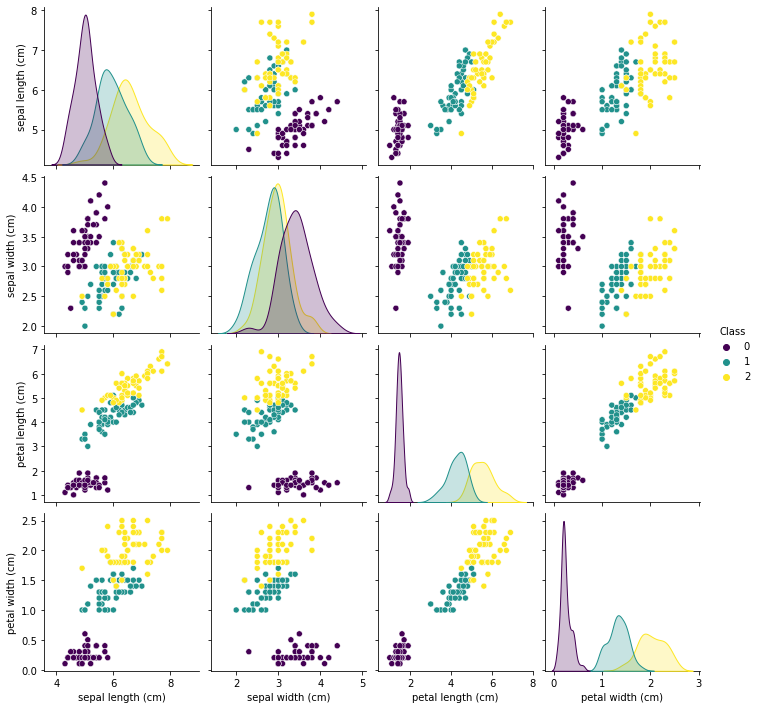

In [8]:
sns.pairplot(df,hue='Class',palette='viridis')

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Etapa 3: Preprocesamiento

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
X = df.values[:,:-1]
Y = df.Class.values

In [36]:
X.shape,Y.shape

((150, 4), (150,))

In [14]:
escalador = StandardScaler()
X_norm = escalador.fit_transform(X)
X_norm.shape

(150, 4)

### Etapa 4: ML

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=10)

In [17]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [18]:
modelo = KNeighborsClassifier()
modelo.fit(X_train,y_train)
res = modelo.predict(X_test)
accuracy_score(y_test,res)

0.9666666666666667

#### Optimización 1: (K-fold cross validation)

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

ml = KNeighborsClassifier()
L = []
for train_index, test_index in kf.split(X_norm):
    X_train, X_test = X_norm[train_index], X_norm[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    ml.fit(X_train,Y_train)
    y_pred = ml.predict(X_test)
    acc = accuracy_score(Y_test,y_pred)
    print('Accuracy: ',acc)
    L.append(acc)

Accuracy:  0.9666666666666667
Accuracy:  0.9666666666666667
Accuracy:  0.9
Accuracy:  0.9333333333333333
Accuracy:  0.9666666666666667


In [20]:
np.mean(L)

0.9466666666666667

#### Optimización 2: (Modelo?)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=10)

L=[]
for k in range(1,51):
    modelo = KNeighborsClassifier(k)
    modelo.fit(X_train,y_train)
    res = modelo.predict(X_test)
    L.append(accuracy_score(y_test,res))

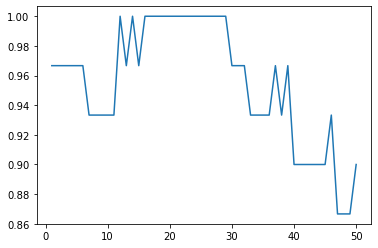

In [22]:
plt.plot(range(1,51),L)
plt.show()

#### Optimización 1 + 2: Datos + Modelo usando GridSearch

In [49]:
X.shape

(150, 4)

In [48]:
Y.shape

(150,)

In [47]:
parameters = {'n_neighbors':range(1,51)}
ml = KNeighborsClassifier()
gs = GridSearchCV(ml, parameters,cv=5,verbose=100,n_jobs=-1)
gs.fit(X,Y)

# Por cada k=1,2,3,...,50 se realizar 5-fold CV, por lo que se tendrían 
# 5 folds por cada uno de los 50 modelos(candidatos) = 250 entrenamientos/testing

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 51)}, verbose=100)

##### Finalmente el mejor modelo sería:

In [24]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=6)

##### Finalmente el mejor accuracy sería:

In [25]:
gs.best_score_

0.9800000000000001